Conventions <br>
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha\_u},\quad 
\alpha_* \rightarrow \texttt{alpha\_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha\_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha\_fp} $ <br>

In [1]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt

Beta functions
$$ \beta_u = 2u-\frac{3u^3}{2\pi (v+u)^3},\quad \beta_v = -\frac{u^2(7v+u)}{r\pi (v+u)^3} $$

In [2]:
# beta functions
def beta_u(u, v):
    return 2*u - 3*u**3 / (2*math.pi*(v + u)**3)

def beta_v(u, v):
    return -u**2*(7*v + u) / (4*math.pi*(v + u)**3)

NGFP
$$ (u_*,v_*) = (\frac{343}{288\pi},-\frac{49}{288\pi}) $$

In [10]:
# NGFP
fp = np.array([343/(288*math.pi), -49/(288*math.pi)])

Stability coefficients
$$ \theta_1 = \frac{1}{3}(1+\sqrt{43}),\quad \tilde{\theta}_1 = \frac{1}{3}(1-\sqrt{43}) $$

In [4]:
# stability coefficients
theta1 = 1/3*(1 + 43**0.5)
Theta1 = 1/3*(1 - 43**0.5)

Eigenvectors
$$ V_1 = \Big( \frac{1}{21}(8+\sqrt{43}),1 \Big)^T,\quad \tilde{V}_1 = \Big( \frac{1}{21}(8-\sqrt{43}),1 \Big)^T $$

In [5]:
# eigenvectors
ev1 = np.array([1/21*(8 + 43**0.5),1]).transpose()
Ev1 = np.array([1/21*(8 - 43**0.5),1]).transpose()

Linear generating function
$$ F^*(u,v) = (172-137\sqrt{43})u + (215+44\sqrt{43})v + \frac{49(1003\sqrt{43}-989)}{288\pi} $$

In [6]:
# linear generating function
def F_fp(u,v):
    return (172 - 137*43**0.5)*u + (215 + 137*43**0.5)*v + 49*(1003*43**0.5 - 989)/(288*math.pi)

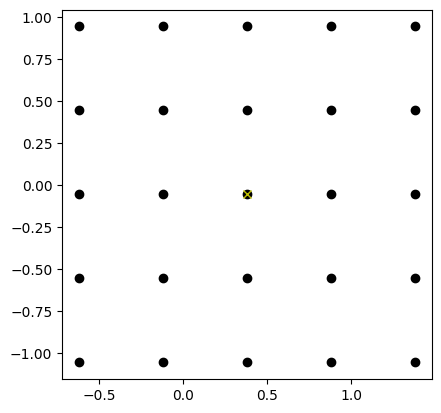

In [18]:
# generate grid of colocation points
nu, nv = (5, 5)
u = np.linspace(fp[0]-1, fp[0]+1, nu)
v = np.linspace(fp[1]-1, fp[1]+1, nv)
ug, vg = np.meshgrid(u, v)

fig_grid = plt.figure()
ax = fig_grid.add_subplot()
plt.plot(ug, vg, marker='o', color='k', linestyle='none')
plt.plot(fp[0], fp[1], marker='x', color='y')
ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# generate one basis function per colocation point

In [ ]:
# calculate derivatives of basis functions

In [ ]:
# write master equation in terms of derivatives of basis functions

In [ ]:
# plug each colocation point into the master equation, giving a system of N_p equations